In [100]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
%matplotlib inline
from sklearn.model_selection import KFold
def kfold(k, predictor, X):
    kf = KFold(n_splits = k, random_state = 0)
    count = 0
    for trains, tests in kf.split(X):
        x_train = X.iloc[trains, 1:-1]
        y_train = X.iloc[trains, -1]
        x_test = X.iloc[tests, 1:-1]
        y_test = X.iloc[tests, -1]
        predictor.fit(x_train, y_train)
        predictions = predictor.predict(x_test)
        count += np.sqrt(mean_squared_error(predictions, y_test))
    return count/k

from collections import Counter

In [91]:
# Load training and test sets (assumes you have these in current working directory)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Inspect training set
train.head()

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251,Target
0,1,0.998952,0.174118,0.999211,0.996460,0.133333,0.057143,0.000,0.0,0.0,...,0.0,0.0,0,0.612863,0.026812,0.522,0.217791,0.233629,0.540962,0.901355
1,2,0.999445,0.174118,0.999329,0.997079,0.133333,0.000000,0.000,0.0,0.0,...,0.0,0.0,0,0.688941,0.075030,0.704,0.246119,0.143860,0.525384,0.913550
2,3,0.998759,0.000000,0.997260,0.996325,0.000000,0.085714,0.125,0.0,0.0,...,0.0,0.0,0,0.156863,0.436279,0.000,0.119091,0.162869,0.361124,0.884824
3,4,0.999619,0.174118,0.997969,0.997321,0.266667,0.057143,0.125,0.0,0.0,...,0.0,0.0,0,0.709647,0.075472,0.513,0.392743,0.377302,0.613776,0.977236
4,5,0.998278,0.174118,0.998427,0.996269,0.200000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0,0.364235,0.041818,0.200,0.096297,0.166459,0.408322,0.921138


In [4]:
# Inspect test set
test.head()

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 242,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251
0,1,0.999849,0.174118,0.999819,0.997841,0.133333,0.2,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.728471,0.054397,0.649,0.416164,0.053998,0.667391
1,2,0.999958,0.164706,1.000000,0.996741,0.066667,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.497255,0.037736,0.375,0.165514,0.101973,0.506650
2,3,0.999666,0.174118,0.999479,0.997376,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.688941,0.019309,1.000,0.192069,0.120700,0.498784
3,4,0.999735,0.174118,0.999655,0.997173,0.133333,0.0,0.0,0.0,0.363636,...,0.0,0.0,0.0,0,0.654118,0.019089,0.333,0.451252,0.164180,0.774466
4,5,0.999806,0.164706,0.999551,0.997234,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.627451,0.160433,0.882,0.147407,0.000000,0.481240


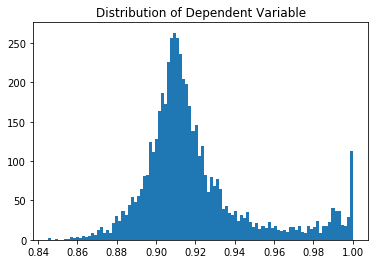

In [5]:
# Explore distribution of target
plt.hist(train['Target'], bins = 100)
plt.title("Distribution of Dependent Variable")
plt.show()

In [81]:
# Split training set into X and y (removing first column containing IDs)
X_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]

In [5]:
# Define function to compute RMSE
def scoreRMSE(predictor, X, true_y):
    predictions = predictor.predict(X)
    return np.sqrt(mean_squared_error(predictions, true_y))

In [101]:
for min_leaf in [1,2,4]:
    print min_leaf
    rfr = RFR(n_estimators=50, min_samples_leaf=min_leaf)
    print kfold(5, rfr, train)

1
0.027169137663525363
2
0.027079539239580064
4
0.027066751093652107


In [103]:
for min_leaf in [6,8,10]:
    print min_leaf
    rfr = RFR(n_estimators=50, min_samples_leaf=min_leaf)
    print kfold(5, rfr, train)

6
0.026910287496352138
8
0.02698256102925829
10
0.026940021926311813


In [104]:
for min_leaf in [12,15,20]:
    print min_leaf
    rfr = RFR(n_estimators=50, min_samples_leaf=min_leaf)
    print kfold(5, rfr, train)

12
0.02701564392881874
15
0.026969103852985003
20
0.0269298872479265


In [111]:
# Fit unregularized linear regression and see RMSE on training set

# >>> regr = RandomForestRegressor(max_depth=2, random_state=0,
# ...                              n_estimators=100)
# >>> regr.fit(X, y)

rfR = RFR(n_estimators=2000, min_samples_leaf=1)
rfR.fit(X_train, y_train)

print ("Training RMSE: ", scoreRMSE(rfR, X_train, y_train))

('Training RMSE: ', 0.010017586115933095)


In [75]:
# Remove first column to make predictions
X_test = test.iloc[:, 1:]
X_test.head()

,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,Feat 10,...,Feat 242,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251
0,0.999849,0.174118,0.999819,0.997841,0.133333,0.2,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.728471,0.054397,0.649,0.416164,0.053998,0.667391
1,0.999958,0.164706,1.000000,0.996741,0.066667,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.497255,0.037736,0.375,0.165514,0.101973,0.506650
2,0.999666,0.174118,0.999479,0.997376,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.688941,0.019309,1.000,0.192069,0.120700,0.498784
3,0.999735,0.174118,0.999655,0.997173,0.133333,0.0,0.0,0.0,0.363636,0.166667,...,0.0,0.0,0.0,0,0.654118,0.019089,0.333,0.451252,0.164180,0.774466
4,0.999806,0.164706,0.999551,0.997234,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.627451,0.160433,0.882,0.147407,0.000000,0.481240


In [112]:
# Make predictions using linear regression model fitted above
predictions = rfR.predict(X_test)

In [113]:
# Format predictions to be compatible with Kaggle upload
sample_submission = pd.DataFrame(data=predictions, columns=['Predicted'])
sample_submission.insert(0, "Id", range(1, 1 + X_test.shape[0]))
sample_submission['Id'] = sample_submission['Id'].astype(str)
sample_submission.head()
# Save predictions to .csv file for upload to Kaggle
sample_submission.to_csv("rfr2000.csv", index=False)

In [10]:
# Save predictions to .csv file for upload to Kaggle
sample_submission.to_csv("sample_submission.csv", index=False)

In [27]:
print X_train.columns

Index([u'Feat 1', u'Feat 2', u'Feat 3', u'Feat 4', u'Feat 5', u'Feat 6',
       u'Feat 7', u'Feat 8', u'Feat 9', u'Feat 10',
       ...
       u'Feat 242', u'Feat 243', u'Feat 244', u'Feat 245', u'Feat 246',
       u'Feat 247', u'Feat 248', u'Feat 249', u'Feat 250', u'Feat 251'],
      dtype='object', length=251)


In [42]:
# Get numerical feature importances
importances = list(rfR.feature_importances_)
featimp = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]
featimp = sorted(featimp, key = lambda x: x[1], reverse = True)
print featimp

[('Feat 251', 0.08), ('Feat 249', 0.06), ('Feat 247', 0.05), ('Feat 248', 0.04), ('Feat 250', 0.04), ('Feat 3', 0.03), ('Feat 4', 0.03), ('Feat 1', 0.02), ('Feat 13', 0.02), ('Feat 125', 0.02), ('Feat 151', 0.02), ('Feat 171', 0.02), ('Feat 172', 0.02), ('Feat 177', 0.02), ('Feat 246', 0.02), ('Feat 5', 0.01), ('Feat 6', 0.01), ('Feat 7', 0.01), ('Feat 9', 0.01), ('Feat 10', 0.01), ('Feat 12', 0.01), ('Feat 14', 0.01), ('Feat 84', 0.01), ('Feat 120', 0.01), ('Feat 124', 0.01), ('Feat 126', 0.01), ('Feat 127', 0.01), ('Feat 128', 0.01), ('Feat 130', 0.01), ('Feat 131', 0.01), ('Feat 137', 0.01), ('Feat 149', 0.01), ('Feat 150', 0.01), ('Feat 153', 0.01), ('Feat 154', 0.01), ('Feat 165', 0.01), ('Feat 175', 0.01), ('Feat 176', 0.01), ('Feat 182', 0.01), ('Feat 183', 0.01), ('Feat 197', 0.01), ('Feat 200', 0.01), ('Feat 214', 0.01), ('Feat 219', 0.01), ('Feat 232', 0.01), ('Feat 233', 0.01), ('Feat 2', 0.0), ('Feat 8', 0.0), ('Feat 11', 0.0), ('Feat 15', 0.0), ('Feat 16', 0.0), ('Feat 17'

In [44]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in featimp]
sorted_features = [importance[0] for importance in featimp]
print sum(sorted_importances)
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

0.8


In [46]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in featimp[0:49]]
print important_feature_names


['Feat 251', 'Feat 249', 'Feat 247', 'Feat 248', 'Feat 250', 'Feat 3', 'Feat 4', 'Feat 1', 'Feat 13', 'Feat 125', 'Feat 151', 'Feat 171', 'Feat 172', 'Feat 177', 'Feat 246', 'Feat 5', 'Feat 6', 'Feat 7', 'Feat 9', 'Feat 10', 'Feat 12', 'Feat 14', 'Feat 84', 'Feat 120', 'Feat 124', 'Feat 126', 'Feat 127', 'Feat 128', 'Feat 130', 'Feat 131', 'Feat 137', 'Feat 149', 'Feat 150', 'Feat 153', 'Feat 154', 'Feat 165', 'Feat 175', 'Feat 176', 'Feat 182', 'Feat 183', 'Feat 197', 'Feat 200', 'Feat 214', 'Feat 219', 'Feat 232', 'Feat 233', 'Feat 2', 'Feat 8', 'Feat 11']


In [51]:
print X_train[important_feature_names].shape
print y_train.shape

(5331, 49)
(5331,)


In [56]:
rfR = RFR(n_estimators=100)
rfR.fit(X_train[important_feature_names], y_train)


ValueError: Number of features of the model must match the input. Model n_features is 49 and input n_features is 251 

In [57]:
print ("Training RMSE: ", scoreRMSE(rfR, X_train[important_feature_names], y_train))
X_test = test.iloc[:, 1:][important_feature_names]


('Training RMSE: ', 0.010185181751690031)


In [58]:
predictions = rfR.predict(X_test)

In [59]:
sample_submission = pd.DataFrame(data=predictions, columns=['Predicted'])
sample_submission.insert(0, "Id", range(1, 1 + X_test.shape[0]))
sample_submission['Id'] = sample_submission['Id'].astype(str)
sample_submission.head()

,Id,Predicted
0,1,0.933655
1,2,0.909929
2,3,0.915780
3,4,0.924992
4,5,0.935605


In [60]:
# Save predictions to .csv file for upload to Kaggle
sample_submission.to_csv("rfr_imp.csv", index=False)